In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set()

# Пример: предсказание велосипедного трафика

In [45]:
weather = pd.read_csv("BicycleWeather.csv", index_col='DATE', parse_dates=True)
counts = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col='Date', parse_dates=True)

In [46]:
counts.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [47]:
# вычислим ежедневный поток велисипедистов
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]
daily.head()

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0


In [48]:
# добавим двоичные столбцы-индикаторы дня недели
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
# добавим индикатор для праздничных дней
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays = USFederalHolidayCalendar().holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Температуры указаны в десятых долях градуса Цельсия, преобразуем в градусы
weather['TMAX'] /= 10
weather['TMIN'] /= 10
# средняя температура
weather['TAVG'] = (weather['TMIN'] + weather['TMAX']) / 2
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,TAVG
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85


In [51]:
# Осадки указаны в десятых долях миллиметра; преобразуем в дюймы
weather['PRCP'] /= 254

In [52]:
# засушливые дни (нулевое количество осадков)
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [53]:
daily = daily.join(weather[['PRCP', 'TAVG', 'dry day']])

In [54]:
# счетчик, который будет увеличиваться с первого дня, и отмерять количество прошедших лет
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [55]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,TAVG,dry day,annual
Date,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0,0.010959


In [62]:
daily = daily.dropna()

In [72]:
# выбрать нужные столбцы и обучить линейную регрессионную модель
columns_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'TAVG', 'dry day', 'annual']
X = daily[columns_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['Predicted'] = model.predict(X)

C:\Users\Данила\AppData\Local\Temp\ipykernel_2960\1941450139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily['Predicted'] = model.predict(X)


<AxesSubplot:xlabel='Date'>

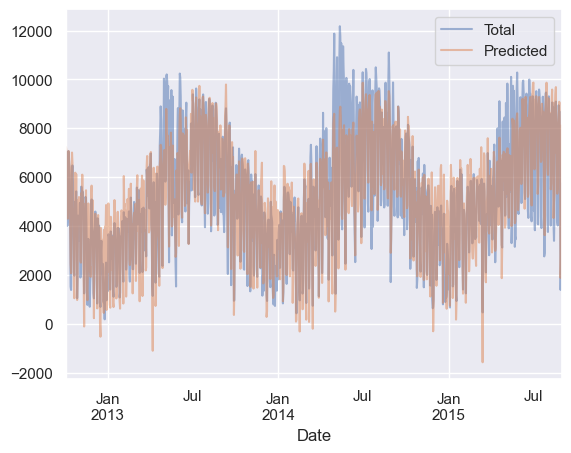

In [73]:
daily[['Total', 'Predicted']].plot(alpha=0.5)

In [74]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon        2960.513483
Tue        3183.555272
Wed        3164.669651
Thu        2942.225263
Fri        2331.201972
Sat        -240.776911
Sun        -302.258156
holiday   -2517.801668
PRCP      -1457.604740
TAVG        214.046865
dry day    1215.372373
annual       66.852538
dtype: float64

In [75]:
# бутстрэппинг - повторные выборки данных
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [76]:
pd.DataFrame({'effect': params.round(0), 'error': err.round(0)})

,effect,error
Mon,2961.0,124.0
Tue,3184.0,123.0
Wed,3165.0,123.0
Thu,2942.0,116.0
Fri,2331.0,121.0
Sat,-241.0,105.0
Sun,-302.0,104.0
holiday,-2518.0,324.0
PRCP,-1458.0,149.0
TAVG,214.0,5.0


- по будним дням велосипедистов намного больше, чем по выходным и праздникам. 
- рост температуры на 1 градус Цельсия стимулирует 214 ± 5 человек взяться за велосипед
- сухой день означает в среднем на 1215 ± 73 больше велосипедистов
- каждый дюйм осадков означает, что на 1458 ± 149 больше людей оставляют велосипед дома
- умеренный рост ежедневного количества велосипедистов на 67 ± 37 человек в год